In [72]:
import pandas as pd
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [93]:
# X: Size (sqft), Number of Bedrooms, Number of floors, Age of Home
# y: Price (1000s dollars)
URL = "https://raw.githubusercontent.com/mihir1125/machine-learning/master/houses.csv"
X_train, y_train = load_data(URL)
X_features = ["Size (sqft)", "Number of Bedrooms", "Number of floors", "Age of Home"]
y_label = "Price (1000s dollars)"

In [ ]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [92]:
#@title Functions
predict = lambda x, w, b: np.dot(x, w) + b

def load_data(url):
    data = np.array(pd.read_csv(URL, header = None))
    no_of_features = data.shape[-1] - 1
    x = data[:, :no_of_features]
    y = data[:, -1]
    return x, y

def compute_cost(X, y, w, b):
    m = X.shape[0] # No. of training examples
    cost = 0.0
    for i  in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

def compute_gradient(X, y, w, b):
    m, n = X.shape # No. of examples, features
    dJ_dw = np.zeros(n)
    dJ_db = 0.

    for i in range(m):
        err = predict(X[i], w, b) - y[i]
        for j in range(n):
            dJ_dw[j] = dJ_dw[j] + err * X[i, j]
        dJ_db += err
    dJ_dw /= m
    dJ_db /= m

    return dJ_dw, dJ_db

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = [] # For graphing later
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dJ_dw, dJ_db = compute_gradient(X, y, w, b)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db
        if i < 100_000:
            J_history.append(cost_function(X, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:10.4f}")
    return w, b, J_history

def normalize_z_score(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return (X_norm, mu, sigma)

In [ ]:
# Testing the implementation

initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations = 1_000
alpha = 5.0e-7

w_final, b_final, J_history = gradient_descent(
    X = X_train,
    y = y_train,
    w_in = initial_w,
    b_in = initial_b,
    cost_function = compute_cost,
    gradient_function = compute_gradient,
    alpha = alpha,
    num_iters = iterations
)

Iteration    0: Cost  2529.4630
Iteration  100: Cost   695.9903
Iteration  200: Cost   694.9207
Iteration  300: Cost   693.8604
Iteration  400: Cost   692.8094
Iteration  500: Cost   691.7676
Iteration  600: Cost   690.7349
Iteration  700: Cost   689.7112
Iteration  800: Cost   688.6965
Iteration  900: Cost   687.6906


## Feature scaling

In [113]:
# z-score normalization
X_norm, mu, sigma = normalize_z_score(X_train)

initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations = 1_00
alpha = 0.5

w_norm, b_norm, J_history = gradient_descent(
    X = X_norm,
    y = y_train,
    w_in = initial_w,
    b_in = initial_b,
    cost_function = compute_cost,
    gradient_function = compute_gradient,
    alpha = alpha,
    num_iters = iterations
)

Iteration    0: Cost 18137.0308
Iteration   10: Cost   253.5392
Iteration   20: Cost   220.6181
Iteration   30: Cost   219.7356
Iteration   40: Cost   219.7120
Iteration   50: Cost   219.7113
Iteration   60: Cost   219.7113
Iteration   70: Cost   219.7113
Iteration   80: Cost   219.7113
Iteration   90: Cost   219.7113


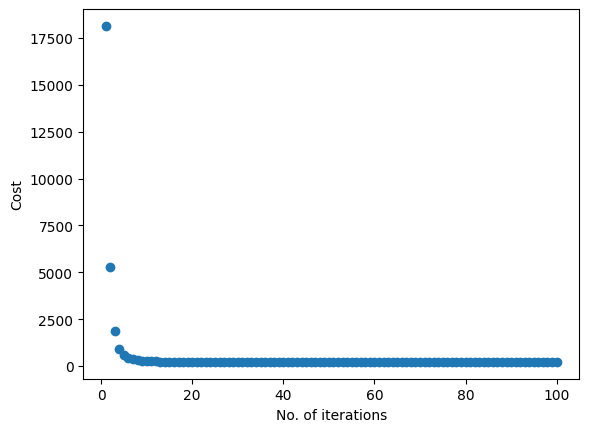

In [114]:
x = np.arange(1, len(J_history)+1)
fig, ax= plt.subplots()
ax.scatter(x, J_history)
ax.set_xlabel("No. of iterations")
ax.set_ylabel("Cost")
plt.show()

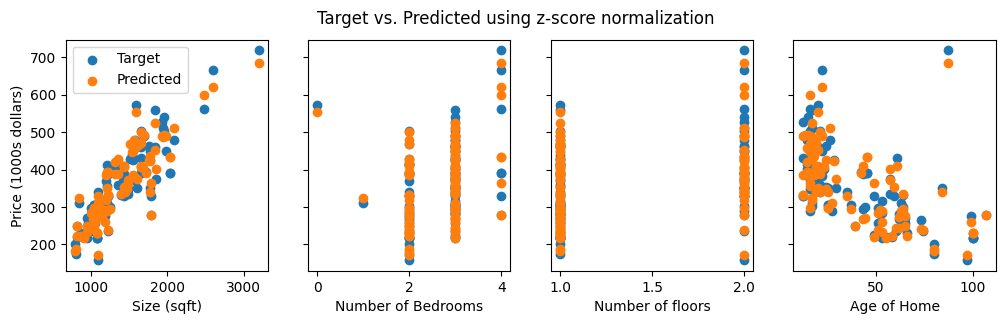

In [115]:
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

# Plot prediction vs. target
fig, ax = plt.subplots(1, 4, figsize = (12, 3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label = 'Target')
    ax[i].scatter(X_train[:, i], yp, label = 'Predicted')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel(y_label)
ax[0].legend()
fig.suptitle("Target vs. Predicted using z-score normalization")
plt.show()